In [26]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import sys, os
#print(os.getcwd(), sys.path)
os.chdir('/home/erich/simsquare')
import sim.main as s
import importlib
from IPython.display import display, HTML

# see more colors here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

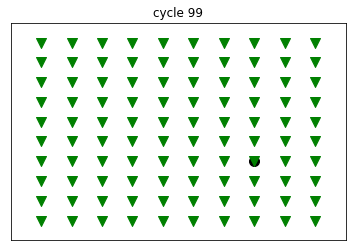

Simulation complete


In [50]:
importlib.reload(s)

def run(cycles = 40, x=30, y=30):
    print("Simulation started")
    universe = s.Universe(x,y)

    for cycle in range(cycles):
        for org in universe.life:
            plt.scatter(org.cell.x, org.cell.y, s=org.plot_size(), marker=org.plot_marker(), c=org.plot_color())
        plt.axis((-1, x, -1, y))
        plt.xticks([])
        plt.yticks([])
        plt.title(f"cycle {cycle}")
        clear_output(wait=True)
        plt.show() 
        universe.cycle()
        #universe.print()
        #display(universe.life)
        time.sleep(0.01)

    print("Simulation complete")

run(cycles=100, x=10, y=10)

In [48]:
# this code makes an animated gif:
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
x=10
y=10
fig = plt.figure()
ax = plt.axes()
line, = ax.plot([], [], lw=3)
plt.xticks([])
plt.yticks([])
print("Simulation started")
universe = s.Universe(x,y)
dots = []
    
def init():
    return line,
def animate(i):
    global dots
    print(f".", end='')
    for dot in dots:
        dot.remove()
    dots = []
    for org in universe.life:
        dots.append(
            plt.scatter(org.cell.x, org.cell.y, s=org.plot_size(), marker=org.plot_marker(), c=org.plot_color()))
    plt.axis((-1, x, -1, y))
    plt.title(f"cycle {i}")
    universe.cycle()
    return line,
gif_name='sim.gif'
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)
anim.save(gif_name, writer='imagemagick')
plt.close()
html = f"""<img src="{gif_name}">
       """
display(HTML(html))

Simulation started
initialising Universe
....................................................................................................